In [1]:
"""
This script creates the figure of the components of the 
daily energy balance of the glacier-wide.
"""

import xarray as xr
import pandas as pd
import numpy as np
import datetime
from dateutil import tz
import netCDF4
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from my_fun.create_date import create_date
from my_fun.select_below_day import select_below_day
from my_fun.hour_to_day_mean import hour_to_day_mean
from my_fun.select_season import select_dry, select_wet



In [3]:
filename_nc  = '../../data/output/Peru_out_1_20160901-20170831.nc'
dir_graphics   = 'out'
name_fig     = 'SEB_com_day'

ds = xr.open_dataset(filename_nc)

time_nc = ds['time'].values
mask_nc = ds['MASK'].values
lat_nc  = ds['lat'].values        
lon_nc  = ds['lon'].values
dem_nc   = ds['HGT'].values

lat_n = len(lat_nc)
lon_n = len(lon_nc)

In [4]:
var_t = create_date(time_nc)
days_num = int(len(time_nc)/24)

var1a   = (ds['G'][:,:,:].values)
var1_d  = hour_to_day_mean(days_num,var1a)
var1a   = (ds['ALBEDO'][:,:,:].values)
var2_d  = hour_to_day_mean(days_num,var1a)

time_d,x,y = var2_d.shape
var3_d  = np.zeros((time_d,x,y))

for t in range(time_d):
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var3_d[t,i,j] = var1_d[t,i,j]*(1-var2_d[t,i,j])

SWnet_m  = select_below_day(dem_nc,mask_nc,var3_d,5000)

time_d,x,y = SWnet_m.shape
var1 = np.zeros((time_d))
for t in range(len(var_t)):
    var1[t] = np.nanmean(SWnet_m[t,:,:])

var1a   = (ds['LWin'][:,:,:].values)
var1_d  = hour_to_day_mean(days_num,var1a)
var1a   = (ds['LWout'][:,:,:].values)
var2_d  = hour_to_day_mean(days_num,var1a)

time_d,x,y = var2_d.shape
var3_d  = np.zeros((time_d,x,y))
for t in range(time_d):
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var3_d[t,i,j] = var1_d[t,i,j]+var2_d[t,i,j]

LWnet_m  = select_below_day(dem_nc,mask_nc,var3_d,5000)
time_d,x,y = LWnet_m.shape
var2 = np.zeros((time_d))
for t in range(len(var_t)):
    var2[t] = np.nanmean(LWnet_m[t,:,:])

var1a   = (ds['H'][:,:,:].values)
var1_d  = hour_to_day_mean(days_num,var1a)
H_m  = select_below_day(dem_nc,mask_nc,var1_d,5000)
time_d,x,y = H_m.shape
var3 = np.zeros((time_d))
for t in range(len(var_t)):
    var3[t] = np.nanmean(H_m[t,:,:])

var1a   = (ds['LE'][:,:,:].values)
var1_d  = hour_to_day_mean(days_num,var1a)
LE_m  = select_below_day(dem_nc,mask_nc,var1_d,5000)
time_d,x,y = LE_m.shape
var4 = np.zeros((time_d))
for t in range(len(var_t)):
    var4[t] = np.nanmean(LE_m[t,:,:])

var1a   = (ds['B'][:,:,:].values)
var1_d  = hour_to_day_mean(days_num,var1a)
B_m  = select_below_day(dem_nc,mask_nc,var1_d,5000)
time_d,x,y = B_m.shape
var5 = np.zeros((time_d))
for t in range(len(var_t)):
    var5[t] = np.nanmean(B_m[t,:,:])

var1a   = (ds['ME'][:,:,:].values)
var1_d  = hour_to_day_mean(days_num,var1a)
ME_m  = select_below_day(dem_nc,mask_nc,var1_d,5000)
time_d,x,y = ME_m.shape
var6 = np.zeros((time_d))
for t in range(len(var_t)):
    var6[t] = np.nanmean(ME_m[t,:,:])


/home/christian/Documents/pro_chris/cosipy_peru/postprocessing/post_cosipy/my_fun/hour_to_day_mean.py:16: RuntimeWarning: Mean of empty slice
  ME_day[t,:,:] = np.nanmean(var_nc,axis=0)


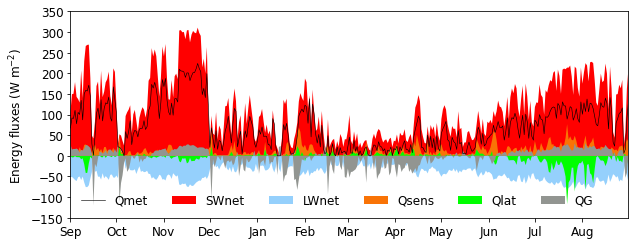

In [7]:
fig, ax = plt.subplots(figsize=(10,3.8))
ax.fill_between(var_t, var1,facecolor=('r'),label='SWnet')
ax.fill_between(var_t, var2,facecolor=('#95d0fc'),label='LWnet')
ax.fill_between(var_t, var3,facecolor=('#f97306'),label='Qsens')
ax.fill_between(var_t, var4,facecolor=([0,1,0]),label='Qlat')
ax.fill_between(var_t, var5,facecolor=('#929591'),label='QG')
ax.plot(var_t, var6,'k',lw=0.6, label='Qmet')
ax.set_yticks(np.arange(-150, 400, 50))
date_form = mdates.DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.set_ylabel('Energy fluxes (W m$^{-2}$)')
ax.set_xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2017-08-31'))
ax.set_ylim(-150,350)
ax.legend(loc='lower left',ncol=6, frameon=False)
font_f = 12
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize

fig.savefig(dir_graphics+'/'+name_fig+'.png',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1)